In [1]:
import os
import pandas as pd
import ast
import numpy as np


In [2]:
folder_path = r'C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\FALLARBOR TOWN'
files = os.listdir(folder_path)

In [3]:
data_frames = []  # 存储每个文件的 DataFrame

for file in files:
    file_path = os.path.join(folder_path, file)
    if file.endswith('.csv'):  # 假设文件是以.csv结尾的
        df = pd.read_csv(file_path, delimiter=';')  # 读取文件为 DataFrame
        data_frames.append(df)  # 将 DataFrame 添加到列表中

# 合并所有 DataFrame
merged_df = pd.concat(data_frames, ignore_index=True)

In [4]:
merged_df

,game_status,enemy_status,state_dict,memory_coords,memory_battle_status,memory_my_sprits_status,timestamp
0,{'return_status': 0},{'enemy_count': 0},{},"{'x_coords': 15, 'y_coords': 10, 'map_number':...","{'player_info_not_sure_address': 3941049504, '...",{},1.685855e+09
1,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': 0},{},"{'x_coords': 15, 'y_coords': 10, 'map_number':...","{'player_info_not_sure_address': 3941049504, '...",{},1.685855e+09
2,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},{},"{'x_coords': 15, 'y_coords': 10, 'map_number':...","{'player_info_not_sure_address': 3941049504, '...",{},1.685855e+09
3,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},{},"{'x_coords': 15, 'y_coords': 10, 'map_number':...","{'player_info_not_sure_address': 3941049504, '...",{},1.685855e+09
4,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},{},"{'x_coords': 15, 'y_coords': 10, 'map_number':...","{'player_info_not_sure_address': 3941049504, '...",{},1.685855e+09
...,...,...,...,...,...,...,...
3874,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},"{'address': 'ROUTE 113 Ch. 1\n', 'money': '276...","{'x_coords': 15, 'y_coords': 10, 'map_number':...","{'player_info_not_sure_address': 3941049504, '...",{},1.685857e+09
3875,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},"{'address': 'ROUTE 113 Ch. 1\n', 'money': '276...","{'x_coords': 15, 'y_coords': 10, 'map_number':...","{'player_info_not_sure_address': 3941049504, '...",{},1.685857e+09
3876,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},"{'address': 'ROUTE 113 Ch. 1\n', 'money': '276...","{'x_coords': 15, 'y_coords': 10, 'map_number':...","{'player_info_not_sure_address': 3941049504, '...",{},1.685857e+09
3877,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},"{'address': 'ROUTE 113 Ch. 1\n', 'money': '276...","{'x_coords': 16, 'y_coords': 10, 'map_number':...","{'player_info_not_sure_address': 3941049504, '...",{},1.685857e+09


In [5]:
df=merged_df.copy()

In [6]:
# 将字符串转换为字典格式
df['memory_coords'] = df['memory_coords'].apply(ast.literal_eval)
df['game_status'] = df['game_status'].apply(ast.literal_eval)

# 提取 "x_coords"、"y_coords" 和 "map_number" 到新列
df['x_coords'] = df['memory_coords'].apply(lambda x: x.get('x_coords'))
df['y_coords'] = df['memory_coords'].apply(lambda x: x.get('y_coords'))
df['map_number'] = df['memory_coords'].apply(lambda x: x.get('map_number'))
df['face_dir']=df['memory_coords'].apply(lambda x: x.get('face_dir'))
df['transport']=df['memory_coords'].apply(lambda x: x.get('transport'))



In [7]:
f = df.drop(['memory_coords'], axis=1)
df = df.drop(['game_status', 'enemy_status', 'state_dict', 'memory_battle_status',"memory_my_sprits_status",'face_dir','transport'], axis=1)


In [8]:
df = df.drop(['timestamp', 'memory_coords'], axis=1)

In [9]:
# 拆分 "map_number" 列
df[['map_num_1', 'map_num_2', 'map_num_3']] = pd.DataFrame(df['map_number'].tolist())

# 删除原始的 "map_number" 列
df = df.drop(['map_number'], axis=1)


In [10]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,x_coords,y_coords,map_num_1,map_num_2,map_num_3
0,15,10,1,13,50
1,15,9,1,13,50
2,15,8,1,13,50
3,14,8,1,13,50
4,13,8,1,13,50
...,...,...,...,...,...
546,9,10,1,28,50
547,10,13,1,28,50
548,10,12,1,28,50
549,10,11,1,28,50


In [11]:
# 计算数值列的统计信息
numeric_cols = ['x_coords', 'y_coords', 'map_num_1', 'map_num_2', 'map_num_3']
statistics = df[numeric_cols].describe()
print(statistics)


         x_coords    y_coords  map_num_1   map_num_2  map_num_3
count  551.000000  551.000000      551.0  551.000000      551.0
mean    27.054446    9.787659        1.0   24.560799       50.0
std     17.635830    3.902949        0.0    6.504224        0.0
min      0.000000    2.000000        1.0   13.000000       50.0
25%     12.000000    7.000000        1.0   28.000000       50.0
50%     25.000000   10.000000        1.0   28.000000       50.0
75%     37.000000   12.000000        1.0   28.000000       50.0
max     67.000000   19.000000        1.0   29.000000       50.0


In [12]:
# 计算数值列之间的相关系数
correlation = df[numeric_cols].corr()
print(correlation)


           x_coords  y_coords  map_num_1  map_num_2  map_num_3
x_coords   1.000000 -0.420621        NaN   0.532916        NaN
y_coords  -0.420621  1.000000        NaN  -0.351049        NaN
map_num_1       NaN       NaN        NaN        NaN        NaN
map_num_2  0.532916 -0.351049        NaN   1.000000        NaN
map_num_3       NaN       NaN        NaN        NaN        NaN


In [13]:
df['new_x'] = df.apply(lambda row: row['x_coords'] + 20 if row['map_num_2'] == 28 else (row['x_coords'] - 40 if row['map_num_2'] == 29 else row['x_coords']), axis=1)
df['new_y'] = df['y_coords']
df

,x_coords,y_coords,map_num_1,map_num_2,map_num_3,new_x,new_y
0,15,10,1,13,50,15,10
1,15,9,1,13,50,15,9
2,15,8,1,13,50,15,8
3,14,8,1,13,50,14,8
4,13,8,1,13,50,13,8
...,...,...,...,...,...,...,...
546,9,10,1,28,50,29,10
547,10,13,1,28,50,30,13
548,10,12,1,28,50,30,12
549,10,11,1,28,50,30,11


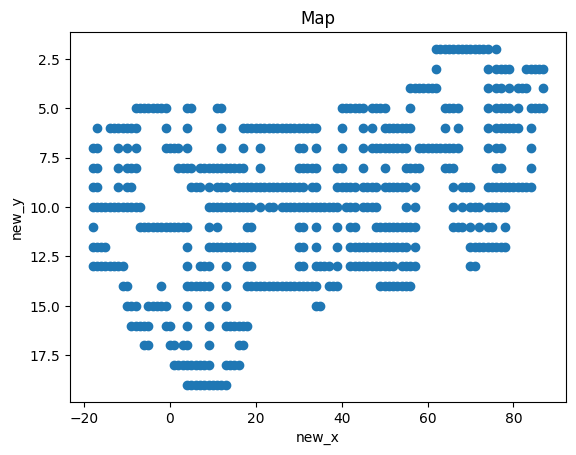

In [14]:
import matplotlib.pyplot as plt

# 创建图形对象和坐标轴
fig, ax = plt.subplots()

# 绘制散点图
ax.scatter(df['new_x'], df['new_y'])

# 反转 y 轴
ax.invert_yaxis()

# 设置坐标轴标签
ax.set_xlabel('new_x')
ax.set_ylabel('new_y')

# 设置标题
ax.set_title('Map')

# 显示图形
plt.show()


In [15]:
# 将坐标点四舍五入到最近的整数
df = df.round(0)
# 创建一个空的DataFrame，它的行和列分别代表y和x的值
grid_df = pd.DataFrame(index=np.arange(int(df['new_y'].min()), int(df['new_y'].max()) + 1),
                       columns=np.arange(int(df['new_x'].min()), int(df['new_x'].max()) + 1))

# 将存在的坐标点填充为1
for _, row in df.iterrows():
    grid_df.at[int(row['new_y']), int(row['new_x'])] = 1

# # 反转y轴
#grid_df = grid_df.iloc[::-1]

# 导出到Excel
grid_df.to_excel("FALLARBOR TOWN coordinates.xlsx")

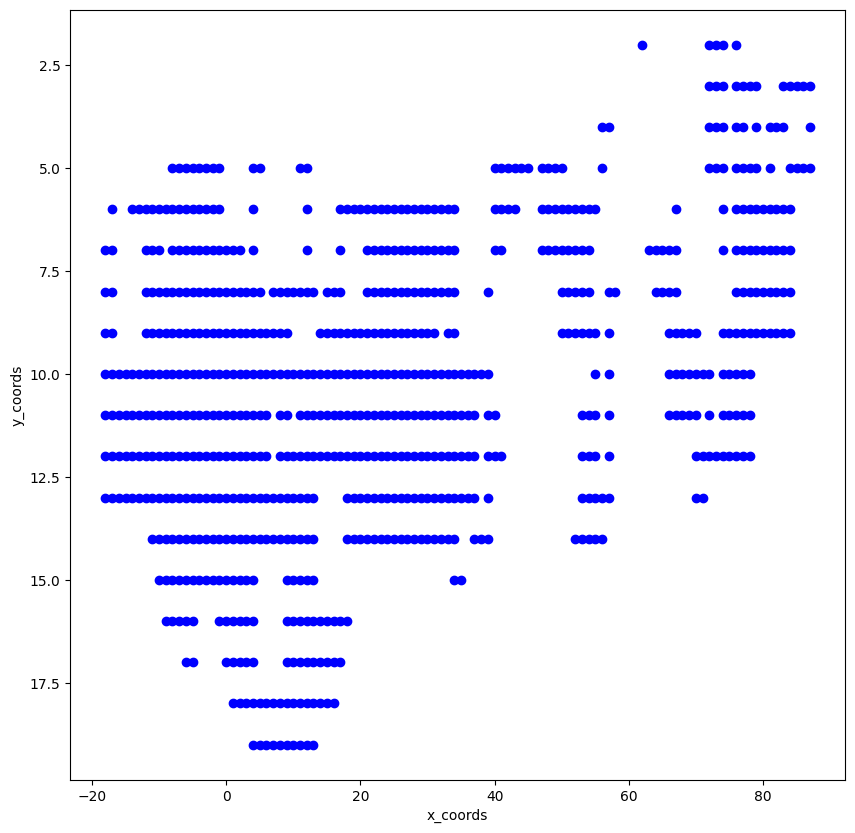

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取Excel文件
df = pd.read_excel(r"C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\FALLARBOR TOWN coordinates.xlsx", index_col=0)

# 反转y轴
#df = df.iloc[::-1]

# 获取非空单元格的坐标
coords = np.argwhere(df.values == 1)
x_coords = df.columns[coords[:, 1]].values
y_coords = df.index[coords[:, 0]].values

# 创建一个新的图形
plt.figure(figsize=(10, 10))

# 画出散点图
plt.scatter(x_coords, y_coords, color='b')
# y轴反转
plt.gca().invert_yaxis()
# 设定坐标轴的标题
plt.xlabel('x_coords')
plt.ylabel('y_coords')

# 显示图形
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取Excel文件
df = pd.read_excel("PETALBURG CITY coordinates.xlsx", index_col=0)

# 反转y轴
df = df.iloc[::-1]

# 获取非空单元格的坐标
coords = np.argwhere(df.values == 1)
x_coords = df.columns[coords[:, 1]].values
y_coords = df.index[coords[:, 0]].values

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取Excel文件
df = pd.read_excel("PETALBURG CITY coordinates.xlsx", index_col=0)

# 将'pc_in'的值更改为112
df = df.replace('pc_in', 112)

# 反转y轴
df = df.iloc[::-1]

# 获取非空单元格的坐标
coords = np.argwhere(df.values > 0)
x_coords = df.columns[coords[:, 1]].values
y_coords = df.index[coords[:, 0]].values

# 创建一个新的图形
plt.figure(figsize=(10, 10))

# 根据值绘制散点图
for x, y in zip(x_coords, y_coords):
    value = df.loc[y, x]
    if np.isnan(value):
        color = 'black'
    elif value == 1:
        color = 'lightblue'
    elif value == 2:
        color = 'darkblue'
    elif value == 3:
        color = 'tan'
    elif value == 4:
        color = 'lightgreen'
    elif value == 112:
        color = 'red'
    else:
        color = 'black'  # 其他未知值为黑色
    plt.scatter(x, y, color=color)


# y轴反转
plt.gca().invert_yaxis()
# 设置坐标轴的标题
plt.xlabel('x_coords')
plt.ylabel('y_coords')

# 显示图形
plt.show()


In [17]:
df = pd.read_excel(r"C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\FALLARBOR TOWN coordinates.xlsx", index_col=0)
# 先重置索引，这样行标签就变成一列
df = df.reset_index()
df




,index,-18,-17,-16,-15,-14,-13,-12,-11,-10,...,78,79,80,81,82,83,84,85,86,87
0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0
2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0
3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0
4,6,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
5,7,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
6,8,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
7,9,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
8,10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# 使用 melt，这会把所有列都转成两列，一列是原来的列名（变量），一列是对应的值
df_melted = df.melt(id_vars='index', var_name='x_coords', value_name='mark')
df_melted


,index,x_coords,mark
0,2,-18,NaN
1,3,-18,NaN
2,4,-18,NaN
3,5,-18,NaN
4,6,-18,NaN
...,...,...,...
1903,15,87,NaN
1904,16,87,NaN
1905,17,87,NaN
1906,18,87,NaN


In [19]:
# 修改列名
df_melted.rename(columns={'index': 'y_coords'}, inplace=True)
df_melted


,y_coords,x_coords,mark
0,2,-18,NaN
1,3,-18,NaN
2,4,-18,NaN
3,5,-18,NaN
4,6,-18,NaN
...,...,...,...
1903,15,87,NaN
1904,16,87,NaN
1905,17,87,NaN
1906,18,87,NaN


In [20]:
# 过滤掉 mark 列为 NaN 的行
df_melted = df_melted.dropna(subset=['mark'])
df_melted

,y_coords,x_coords,mark
5,7,-18,1.0
6,8,-18,1.0
7,9,-18,1.0
8,10,-18,1.0
9,11,-18,1.0
...,...,...,...
1873,3,86,1.0
1875,5,86,1.0
1891,3,87,1.0
1892,4,87,1.0


In [21]:
# 把值为PC_IN的单元格的值改成112
df_melted.loc[df_melted['mark'] == 'pc_in', 'mark'] = 112

df_melted.loc[df_melted['mark'] == 'farming', 'mark'] = 66
# 所有float类型的值转成int
df_melted = df_melted.astype({'mark': 'int'})

df_melted.reset_index(drop=True, inplace=True)

# 输出查看结果
print(df_melted)

     y_coords x_coords  mark
0           7      -18     1
1           8      -18     1
2           9      -18     1
3          10      -18     1
4          11      -18     1
..        ...      ...   ...
847         3       86     1
848         5       86     1
849         3       87     1
850         4       87     1
851         5       87     1

[852 rows x 3 columns]


In [22]:
df_melted.to_csv('FALLARBOR_TOWN.csv')


In [ ]:
import matplotlib.pyplot as plt
df_melted=pd.read_csv(r'C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\SOOTOPOLIS_CITY_coords_tracking.csv',index_col=0)
# 创建颜色映射
color_map = {1: 'lightblue', 2: 'blue', 3: 'khaki', 4: 'green', 112: 'red'}

# 将 mark 列转换为颜色
df_melted['color'] = df_melted['mark'].map(color_map)

# 绘制散点图
plt.figure(figsize=(10, 8))
plt.scatter(df_melted['x_coords'], df_melted['y_coords'], c=df_melted['color'], alpha=0.5)

# 反转 y 轴
plt.gca().invert_yaxis()

# 设置图标题和轴标签
plt.title('Scatter plot with color-coded marks')
plt.xlabel('x_coords')
plt.ylabel('y_coords')

# 显示图形
plt.show()
